<a href="https://colab.research.google.com/github/RehanNaveid/DC/blob/main/Natural%20Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

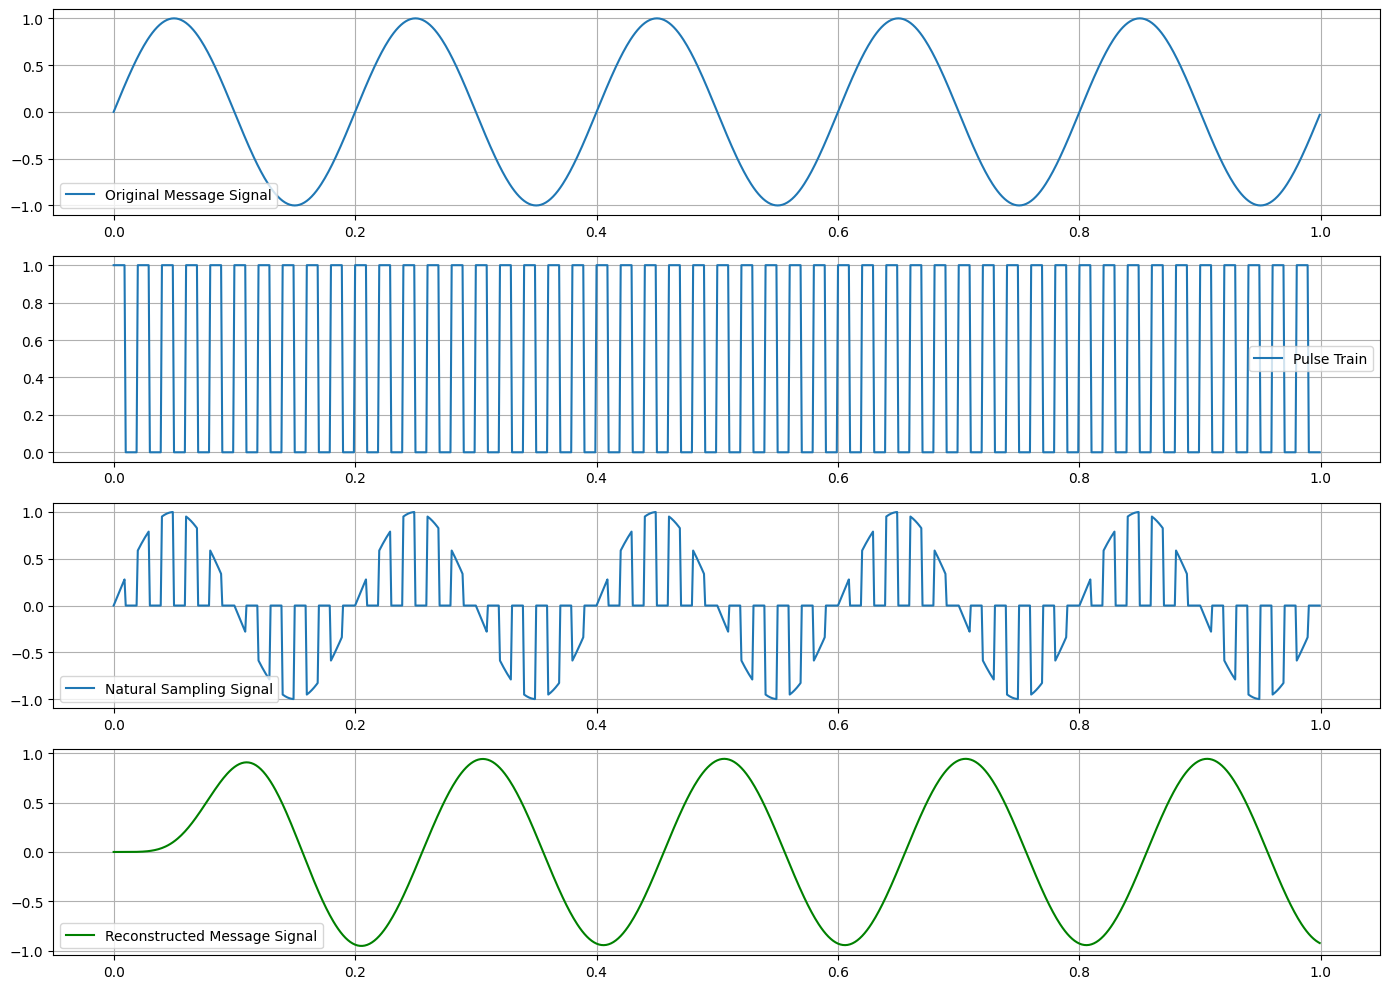

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
# Parameters
fs = 1000  # Sampling frequency (samples per second)
T = 1  # Duration in seconds
t = np.arange(0, T, 1/fs)  # Time vector
# Message Signal (sine wave message)
fm = 5  # Frequency of message signal (Hz)
message_signal = np.sin(2 * np.pi * fm * t)
# Pulse Train Parameters
pulse_rate = 50  # pulses per second
pulse_train = np.zeros_like(t)
# Construct Pulse Train (rectangular pulses)
pulse_width = int(fs / pulse_rate / 2)
for i in range(0, len(t), int(fs / pulse_rate)):
    pulse_train[i:i+pulse_width] = 1
# Modulation - Natural Sampling
samp_signal = message_signal * pulse_train
# ---------------------------------------------
# Reconstruction (Demodulation) Process
# ---------------------------------------------
# Sample the Natural sampling signal at pulse locations (ideal sampling)
sampled_signal = samp_signal[pulse_train == 1]
# Create a time vector for the sampled points
sample_times = t[pulse_train == 1]
# Interpolation - Zero-Order Hold (just for visualization)
reconstructed_signal = np.zeros_like(t)
for i, time in enumerate(sample_times):
    index = np.argmin(np.abs(t - time))
    reconstructed_signal[index:index+pulse_width] = sampled_signal[i]
# Low-pass Filter (optional, smoother reconstruction)
def lowpass_filter(signal, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, signal)
reconstructed_signal = lowpass_filter(reconstructed_signal,10, fs)
# ---------------------------------------------
# Plotting
# ---------------------------------------------
plt.figure(figsize=(14, 10))
# Original Message Signal
plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label='Original Message Signal')
plt.legend()
plt.grid(True)
# Pulse Train
plt.subplot(4, 1, 2)
plt.plot(t, pulse_train, label='Pulse Train')
plt.legend()
plt.grid(True)
# Sampling Signal
plt.subplot(4, 1, 3)
plt.plot(t, samp_signal, label='Natural Sampling Signal')
plt.legend()
plt.grid(True)
# Reconstructed Signal
plt.subplot(4, 1, 4)
plt.plot(t, reconstructed_signal, label='Reconstructed Message Signal', color='green')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()